In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

def plot_vectors(data, title):
    # mean values
    mean_x = data.Factor1.mean()
    mean_y = data.Factor2.mean()
    mean_z = data.Factor3.mean()

    ################################
    #plotting eigenvectors
    ################################    

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(data.Factor1, data.Factor2, data.Factor3, 'o', markersize=10, color='g', alpha=0.2)

    for i, row in data.iterrows():
        #ax.plot([mean_x,v[0]], [mean_y,v[1]], [mean_z,v[2]], color='red', alpha=0.8, lw=3)
        #I will replace this line with:
        x=row['Factor1']
        y=row['Factor2']
        z=row['Factor3']
        a = Arrow3D([0, x], [0, y], [0, z], mutation_scale=20, 
                    lw=3, arrowstyle="-|>", color="b")
        ax.text(x, y, z+0.01, row['Feature'],fontsize=14)
        ax.add_artist(a)

    ax.set_xlabel('Factor 1', fontsize=14)
    ax.set_ylabel('Factor 2', fontsize=14)
    ax.set_zlabel('Factor 3', fontsize=14)

    plt.title(title)    
    


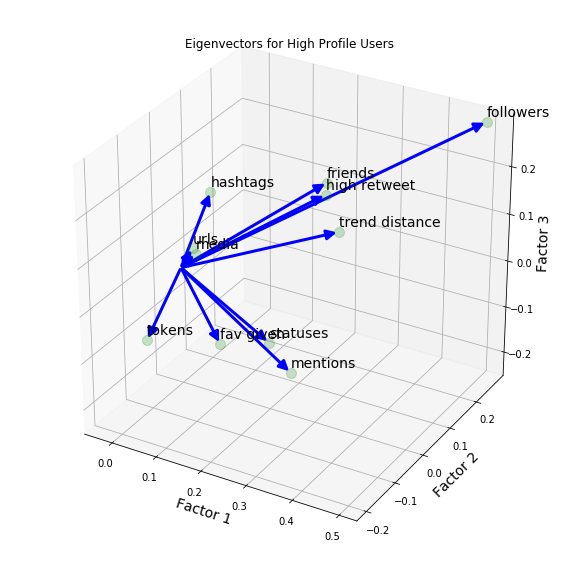

In [4]:
ds = pd.read_csv('results/factors_loadingsh.csv')
plot_vectors(ds, 'Eigenvectors for High Profile Users')

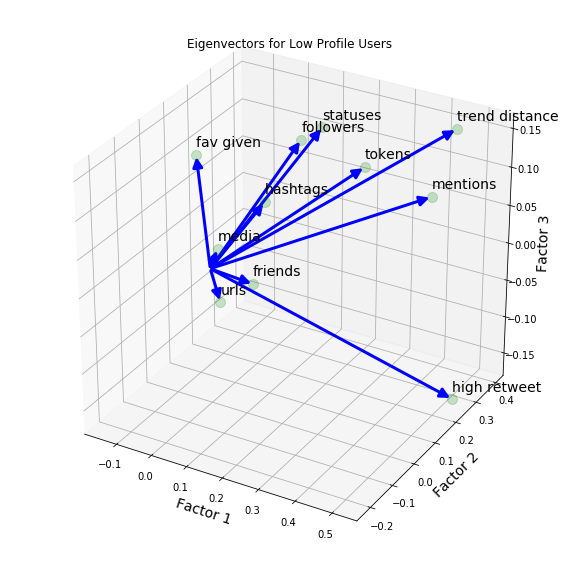

In [10]:
ds = pd.read_csv('results/factors_loadingsl.csv')
plot_vectors(ds, 'Eigenvectors for Low Profile Users')